In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy

In [62]:
def shadow_removal(img):
    #function to determine the regions of interest
    def region_of_interest(img, vertices):
        mask = np.zeros_like(img)
        channel_count = 2
        match_mask_color = 255
        if len(img.shape) > 2:
            channel_count = img.shape[2]
            match_mask_color = (255,) * channel_count
        cv.fillPoly(mask, vertices, match_mask_color)
        masked_image = cv.bitwise_and(img, mask)
        return masked_image, mask
        
    #function to convert the shadow region into the surrounding road
    def convert(img,shadow_boundary,red_region):
        height=img.shape[0]

        for i in range(height):
            if np.sum(np.absolute(shadow_boundary - img[i])) < 150 or np.sum(np.absolute(red_region - img[i])) < 150:
                img[i] = road_hsv        
        img = img.reshape(hsv.shape)
        return img

    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    height = img.shape[0]
    width = img.shape[1]

    #defining the masking coordinates for the region of interest
    roi_vertices = [
    (476, height),
    (2118, 760),
    (2478, 801),
    (3019, 861),
    (width, height)
    ]

    roi_image, roi_mask = region_of_interest(img,
                np.array([roi_vertices], np.int32),)

                
    hsv = cv.cvtColor(roi_image,cv.COLOR_RGB2HSV)
    road_hsv = np.array([20, 30, 160], dtype = np.uint8)

    shadow_boundary = np.array([205, 15, 55]) 
    red_region = np.array([0, 0, 90]) 
    converted_hsv = hsv.reshape((-1, 3))
    converted_hsv=convert(converted_hsv,shadow_boundary,red_region)

    roi_mask = roi_mask > 0 #converted all white pixes into 1 while the black pixes remain intact
    pic = roi_mask * cv.cvtColor(converted_hsv,cv.COLOR_HSV2RGB) + ~roi_mask * img #adding the image in such a way that only the shadow region gets replaced by the surrounding road
    return pic

In [63]:
img = cv.imread('ShadowRemoval1.jpg')
img = cv.medianBlur(img, 3)
pic =shadow_removal(img)

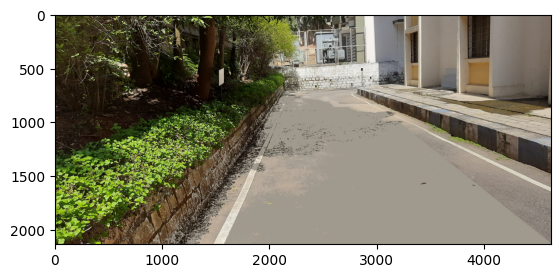

In [64]:
plt.imshow(pic)
plt.show()

In [65]:
# pic = cv.GaussianBlur(pic, (7, 7), 5)


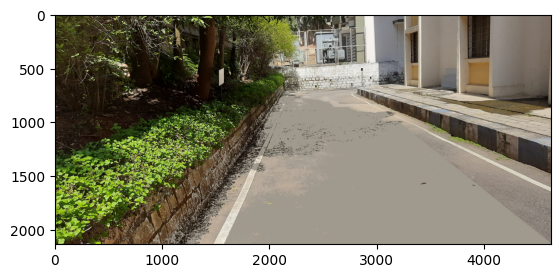

In [66]:
plt.imshow(pic)
plt.show()

In [67]:
pic = cv.cvtColor(pic, cv.COLOR_RGB2BGR)


In [68]:
cv.imwrite("output_ShadowRemoval1.png", pic)

True